In [1]:
import os
import sys

# data manipulation libraries
import pandas as pd
import numpy as np

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.identify_missing_data import identify_missing_data
from src.helpers import one_hot, identify_highly_correlated_features
from src.feature_importance_plot import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot

In [2]:
raw_data = pd.read_csv("../data/heart_attack_data.csv")

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [4]:
pd.set_option('display.max_columns', None)
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [5]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


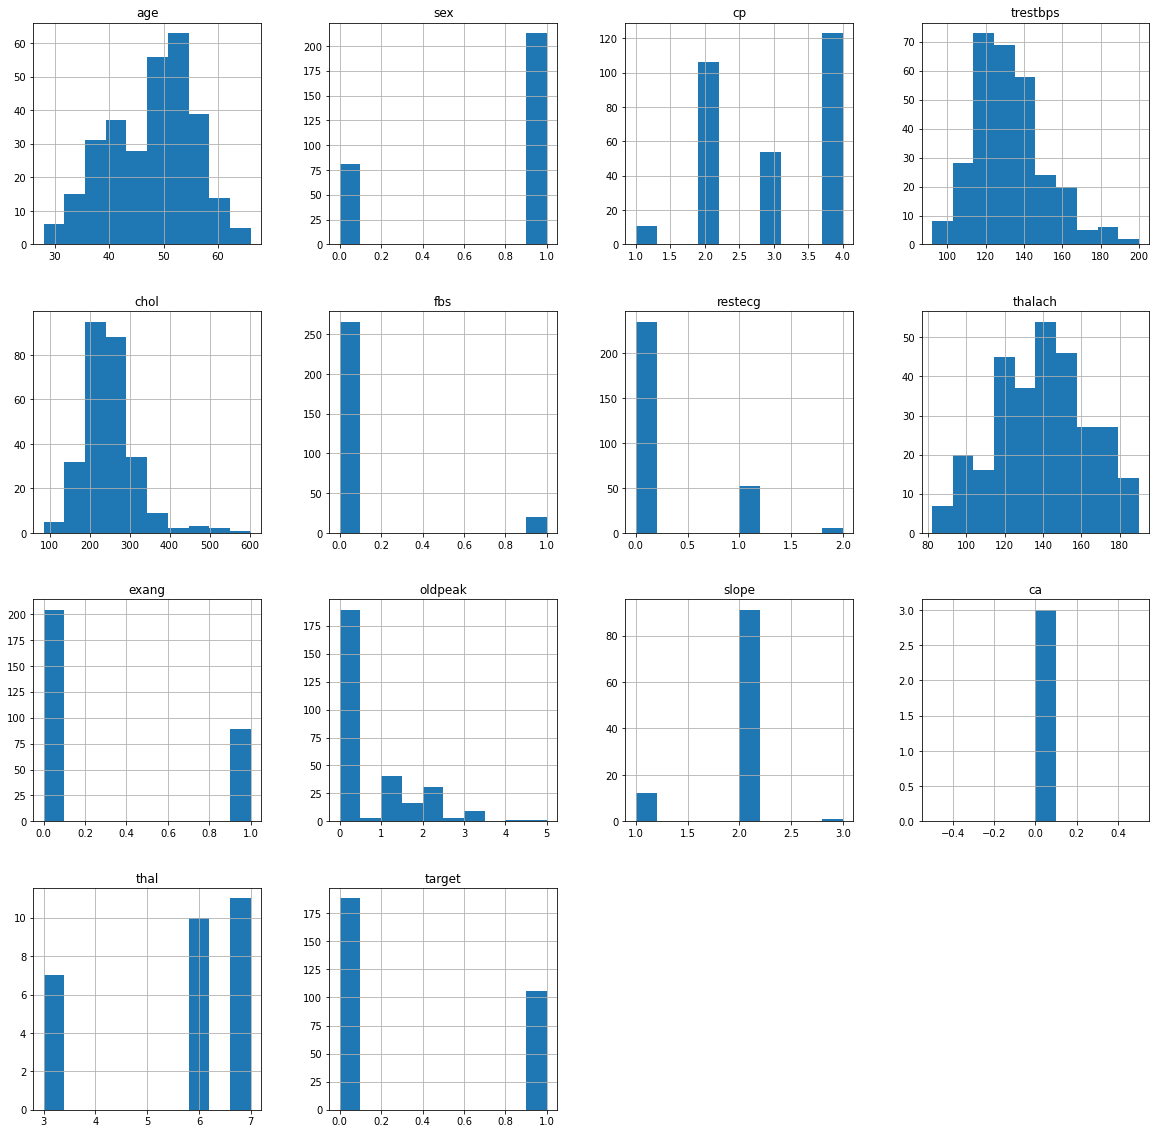

In [6]:
plt.rcParams["figure.figsize"] = (20,20)
raw_data.hist();

In [7]:
raw_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.013618,0.145826,0.245203,0.090979,0.182212,0.051989,-0.459420,0.238925,0.177707,-0.068000,NaN,0.274092,0.159315
sex,0.013618,1.000000,0.249875,0.089112,0.028797,0.042798,-0.104614,-0.111781,0.154925,0.118931,0.213921,NaN,-0.130013,0.272781
cp,0.145826,0.249875,1.000000,0.085631,0.138847,0.033346,-0.018154,-0.370440,0.494674,0.353109,0.392841,NaN,-0.048622,0.505864
trestbps,0.245203,0.089112,0.085631,1.000000,0.084264,0.095416,0.013914,-0.184961,0.213856,0.206848,0.035536,NaN,0.206153,0.139717
chol,0.090979,0.028797,0.138847,0.084264,1.000000,0.122902,0.050249,-0.127676,0.168518,0.109343,0.117838,NaN,-0.113407,0.209318
fbs,0.182212,0.042798,0.033346,0.095416,0.122902,1.000000,0.049160,-0.071489,0.116170,0.062316,0.201315,NaN,0.164353,0.163232
restecg,0.051989,-0.104614,-0.018154,0.013914,0.050249,0.049160,1.000000,0.004481,0.045392,0.042193,-0.031222,NaN,-0.188991,-0.029937
thalach,-0.459420,-0.111781,-0.370440,-0.184961,-0.127676,-0.071489,0.004481,1.000000,-0.401980,-0.303028,-0.175356,NaN,-0.456133,-0.331393
exang,0.238925,0.154925,0.494674,0.213856,0.168518,0.116170,0.045392,-0.401980,1.000000,0.632108,0.418895,NaN,0.181142,0.583847
oldpeak,0.177707,0.118931,0.353109,0.206848,0.109343,0.062316,0.042193,-0.303028,0.632108,1.000000,0.121817,NaN,0.116806,0.545700


<AxesSubplot:>

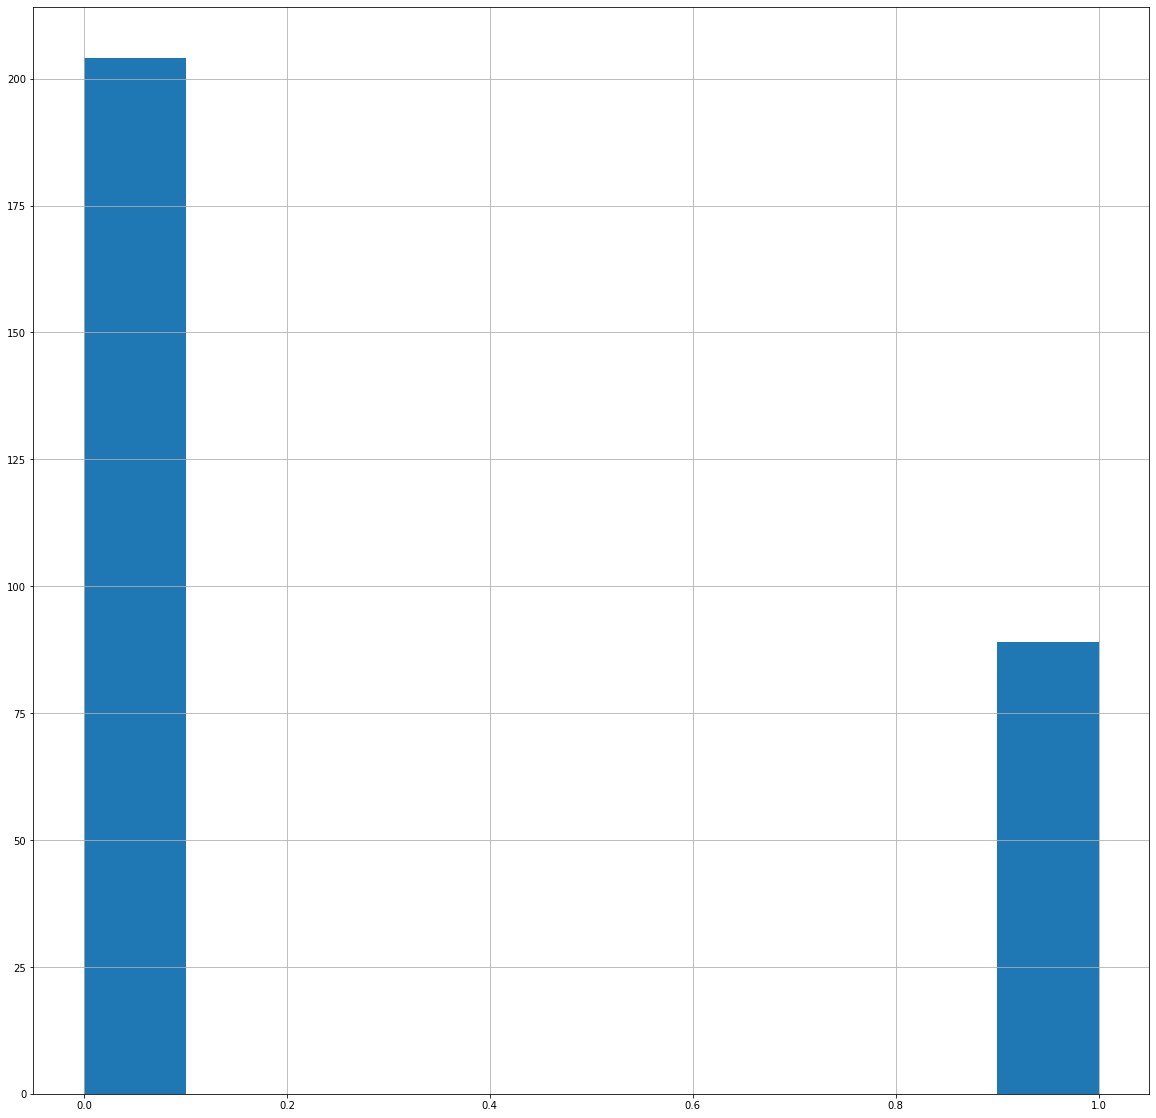

In [8]:
raw_data.exang.hist()

In [9]:
identify_highly_correlated_features(raw_data, correlation_threshold=0.3)

,corr_feature,drop_feature,corrrelation_values
10,exang,oldpeak,0.63
12,exang,target,0.58
13,oldpeak,target,0.55
14,slope,target,0.54
15,thal,target,0.53
5,cp,target,0.51
2,cp,exang,0.49
0,age,thalach,0.46
8,thalach,thal,0.46
11,exang,slope,0.42


In [10]:
# missing data

missing_value_df = identify_missing_data(raw_data)
missing_value_df

,feature,percent_missing,data_type
0,ca,98.98,float64
1,thal,90.48,float64
2,slope,64.63,float64
3,chol,7.82,float64
4,fbs,2.72,float64
5,trestbps,0.34,float64
6,restecg,0.34,float64
7,thalach,0.34,float64
8,exang,0.34,float64
9,age,0.00,int64


In [11]:
cols_to_drop_1 = list(missing_value_df[missing_value_df.percent_missing > 40].feature)
cols_to_drop_1

['ca', 'thal', 'slope']

In [12]:
identify_missing_data(raw_data)

,feature,percent_missing,data_type
0,ca,98.98,float64
1,thal,90.48,float64
2,slope,64.63,float64
3,chol,7.82,float64
4,fbs,2.72,float64
5,trestbps,0.34,float64
6,restecg,0.34,float64
7,thalach,0.34,float64
8,exang,0.34,float64
9,age,0.00,int64


In [13]:
raw_data=raw_data.drop(columns=cols_to_drop_1, axis =1)
raw_data.shape

(294, 11)

In [14]:
identify_missing_data(raw_data)

,feature,percent_missing,data_type
0,chol,7.82,float64
1,fbs,2.72,float64
2,trestbps,0.34,float64
3,restecg,0.34,float64
4,thalach,0.34,float64
5,exang,0.34,float64
6,age,0.00,int64
7,sex,0.00,int64
8,cp,0.00,int64
9,oldpeak,0.00,float64


In [15]:
raw_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [16]:
raw_data.std()

age          7.811812
sex          0.447533
cp           0.965117
trestbps    17.626568
chol        67.657711
fbs          0.255476
restecg      0.460868
thalach     23.589749
exang        0.460665
oldpeak      0.908648
target       0.480977
dtype: float64

In [17]:
raw_data.chol.fillna(raw_data.chol.mean(), inplace = True)
raw_data.fbs.fillna(raw_data.fbs.mean(), inplace = True)
raw_data.trestbps.fillna(raw_data.trestbps.mean(), inplace = True)
raw_data.restecg.fillna(raw_data.restecg.mean(), inplace = True)
raw_data.thalach.fillna(raw_data.thalach.mean(), inplace = True)
raw_data.exang.fillna(raw_data.exang.mean(), inplace = True)

In [18]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,0


In [19]:
raw_data[raw_data.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
101,49,0,2,110.0,250.848708,0.0,0.0,160.0,0.0,0.0,0
102,49,0,2,110.0,250.848708,0.0,0.0,160.0,0.0,0.0,0


In [20]:
target = raw_data.target
features = raw_data.drop(['target'], axis =1)

In [21]:
raw_data[~raw_data.duplicated(keep='first')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,1


In [22]:
target

0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: target, Length: 294, dtype: int64

In [23]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0.0,0.0
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5
290,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0
291,56,1,4,155.0,342.000000,1.0,0.0,150.0,1.0,3.0
292,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.2, 
                                                random_state = 8)

In [25]:
print("Training Data")
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Training Data
Shape of X_train (235, 10)
Shape of y_train (235,)


In [26]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred_dtr = dtr.predict(X_test)
y_pred_dtr

array([0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0.])

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [32]:
r2 = r2_score(y_test, y_pred_dtc)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred_dtc)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_dtc)
print("Mean Squared Error:", round(mse))

R2: -0.32
Mean Absolute Error: 0
Mean Squared Error: 0


In [33]:
r2 = r2_score(y_test, y_pred_dtr)
print("R2:", round(r2, 2))
mae = mean_absolute_error(y_test, y_pred_dtr)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error:", round(mse))

R2: -0.24
Mean Absolute Error: 0
Mean Squared Error: 0
